In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os

In [2]:
from util import RESOURCE_DIR, IMAGES_DIR
type_characterization = ['database.xlsx', 'implementation.xlsx']
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[0]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
data_with_index = df.set_index("Projects")
data_with_index.reset_index(inplace=True)

data_with_index.rename(columns={'MySQL_Maria DB': 'MySQL'}, inplace=True)
data_with_index.rename(columns={'PostgreSQL_ CockroachDB': 'PostgreSQL'}, inplace=True)
data_with_index.rename(columns={'MS SQL Server_Microsoft Azure SQL Database': 'MS SQL Server'}, inplace=True)

data_with_index.head()


,Projects,Domains,Microsoft Azure Table Storage,MySQL,HyperSQL,MarkLogic,MS SQL Server,Ignite-NoSql,Ignite-Sql,Ignite,...,Microsoft Azure CosmosDB,MS Access,SAP Adaptive Server,CouchDB,ClickHouse,Vertica,Teradata,PostgreSQL,PostGIS,Etcd
0,camel,Software Development,0,1,1,0,1,1,0,1,...,1,0,0,0,0,0,0,1,1,1
1,activemq,Network,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Activiti,Enterprise Resource Planning,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,lottie-android,Game,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,aliyun-openapi-java-sdk,Infrastructure Management,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data_with_index.iloc[: , 2:].sum().sort_values(ascending=False)

MySQL                            113
PostgreSQL                        92
H2                                92
Redis                             80
Oracle                            78
HyperSQL                          55
MS SQL Server                     53
MongoDB                           47
Google Cloud Datastore            33
DynamoDB                          32
IBM DB2                           30
SQLite                            29
Cassandra                         24
Hazelcast                         19
HBase                             16
SAP SQL Anywhere                  14
SAP Adaptive Server               13
MarkLogic                         13
Neo4j                             12
ClickHouse                        12
Firebird                          10
Informix                          10
PostGIS                           10
SapHana                            9
Teradata                           8
Snowflake                          8
MS Access                          7
C

In [4]:
(data_with_index.iloc[:, 2:].sum().sort_values(ascending=False) > 0).sum()


49

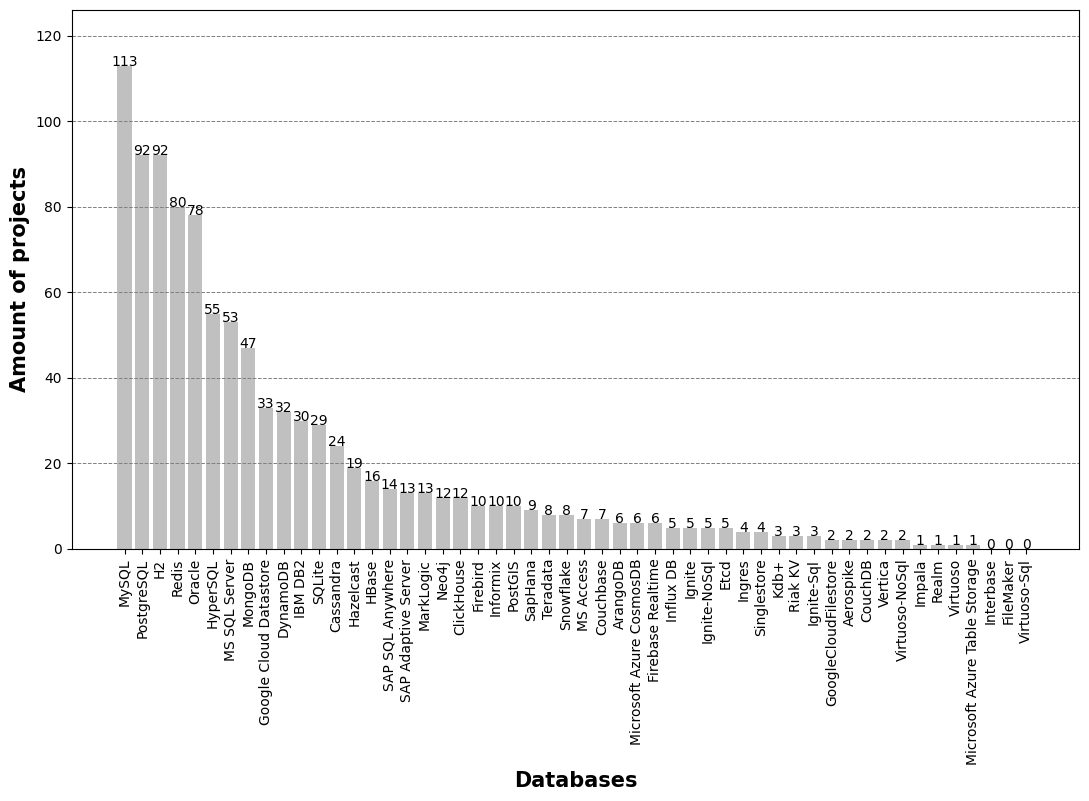

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13,7))

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

df = data_with_index.iloc[:, 2:].sum().sort_values(ascending=False)

# Gráfico de barras
plt.bar(df.index, df.values, color='silver')
addlabels(df.index, df.values)

# Adicionando linhas horizontais nas marcações do eixo Y
y_ticks = plt.gca().get_yticks()  # Obtém as marcações do eixo Y

for y_tick in y_ticks:
    plt.axhline(y=y_tick, color='gray', linestyle='--', linewidth=0.7)  # Adiciona linhas horizontais

plt.xticks(rotation=90)
plt.xlabel("Databases", fontweight="bold", fontsize=15)
plt.ylabel("Amount of projects", fontweight="bold", fontsize=15)

#plt.title("Distributions of Databases in Java Projects")
plt.show()


In [6]:
# Ajustando o df para que eu possa fazer o gráfico de forma empilhada
db_types = data_with_index.iloc[:, data_with_index.columns != 'Domains']
db_types = db_types.set_index('Projects').transpose()
db_types.index.name = 'Databases'
relational_dbs = ['Oracle', 'MySQL', 'MS SQL Server', 'PostgreSQL', 'IBM DB2', 
                  'MS Access', 'SQLite',  'Snowflake', 'Teradata', 'SapHana', 
                  'FileMaker', 'SAP Adaptive Server', 'Informix', 'Firebird', 'Vertica', 
                  'Impala', 'ClickHouse', 'H2', 'Ignite-Sql', 'Virtuoso-Sql', 
                  'Singlestore', 'Interbase', 'Ingres','SAP SQL Anywhere', 'HyperSQL']

map_dict = {name: "Relational" for name in relational_dbs}

db_types['Model'] = db_types.index.to_series().map(map_dict)
db_types['Model'] = db_types['Model'].fillna("Non Relational")
model = db_types.pop("Model")
db_types.insert(0, "Model", model)
db_types['Relational'] = db_types.apply(lambda row: row.iloc[1:].sum() if row['Model'] == 'Relational' else 0, axis=1)
db_types['Non Relational'] = db_types.apply(lambda row: row.iloc[1:].sum() if row['Model'] == 'Non Relational' else 0, axis=1)

#db_types.loc[['MarkLogic'], 'Model'] = 'Multi Model' #'Virtuoso', 'Ignite', Retirei pois estava com erro.
db_types.loc['Virtuoso', 'Relational'] = 0
db_types.loc['Virtuoso', 'Non Relational'] = 2
db_types.loc['Ignite', 'Relational'] = 3
db_types.loc['Ignite', 'Non Relational'] = 5
#db_types.loc['MarkLogic', 'Relational'] = 0
#db_types.loc['MarkLogic', 'Non Relational'] = 3

db_types.rename(columns={'Projects':  ''},)
db_types.to_excel("output.xlsx")


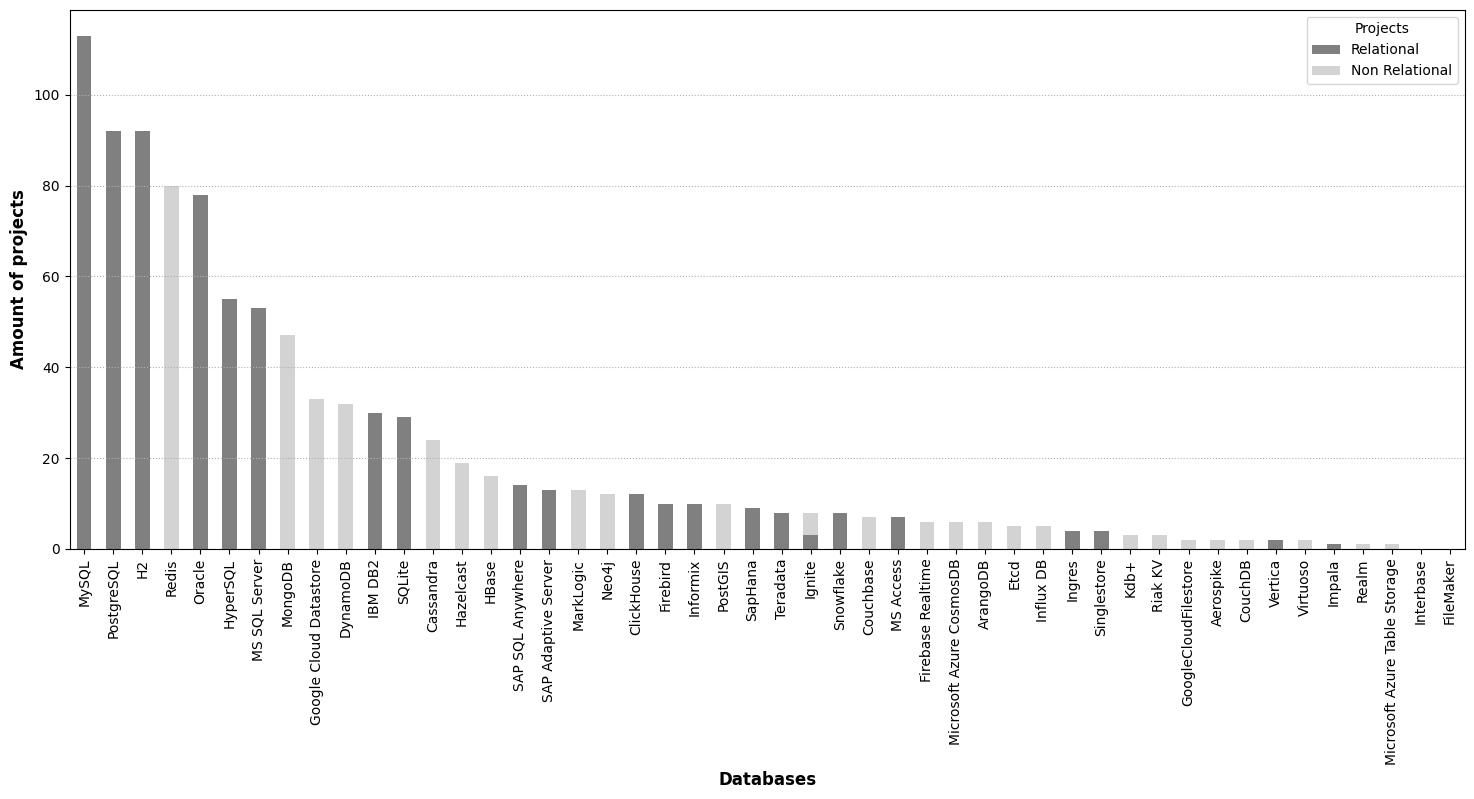

In [7]:
# Preparação dos dados (mesmo que já estava)
df_graph = db_types[['Model', 'Relational', 'Non Relational']].copy()
df_graph['Amount of Projects'] = db_types['Relational'] + db_types['Non Relational']
df_graph.drop(['Ignite-NoSql'], inplace=True)  # Remover banco específico
df_graph.drop(['Ignite-Sql'], inplace=True)  # Remover banco específico
df_graph.drop(['Virtuoso-Sql'], inplace=True)  # Remover banco específico
df_graph.drop(['Virtuoso-NoSql'], inplace=True)  # Remover banco específico

df_graph = df_graph.sort_values(by='Amount of Projects', ascending=False)

# Define uma paleta de cores
plt.rc('axes', prop_cycle=plt.cycler('color', ['gray', 'lightgray']))

# Cria o gráfico de barras empilhadas
ax = df_graph.plot(y=['Relational', 'Non Relational'], kind='bar', stacked=True, figsize=(18, 7))

# Configurações do eixo
ax.set_xlabel("Databases", fontsize=12, fontweight='bold')
ax.set_ylabel("Amount of projects", fontsize=12, fontweight='bold')

# Remove as anotações (números) nas barras
# for i in ax.patches:  
#     if i.get_height() != 0:
#         ax.annotate(str(int(i.get_height())), (i.get_x() + i.get_width() / 2, i.get_height()),
#                     ha='center', va='baseline', fontsize=10, color='black', 
#                     xytext=(0, 1), textcoords='offset points')

# Adiciona grid pontilhado no eixo Y
plt.grid(axis='y', linestyle=':', linewidth=0.8)

# Salvar como PDF
plt.savefig(IMAGES_DIR + "/fig3.pdf", format="pdf", bbox_inches="tight")
plt.show()

#juntas os bancos SQL e Não SQL


In [8]:

# Lista de bancos de dados relacionais
relational_dbs = ['Oracle', 'MySQL', 'MS SQL Server', 'PostgreSQL', 'IBM DB2', 
                  'MS Access', 'SQLite',  'Snowflake', 'Teradata', 'SapHana', 
                  'FileMaker', 'SAP Adaptive Server', 'Informix', 'Firebird', 'Vertica', 
                  'Impala', 'ClickHouse', 'H2', 'Ignite-Sql', 'Virtuoso-Sql', 
                  'Singlestore', 'Interbase', 'Ingres','SAP SQL Anywhere', 'HyperSQL', 
                  'Virtuoso', 'Ignite']

# Seleciona as colunas que correspondem aos bancos relacionais no DataFrame
df_relational = data_with_index[relational_dbs]

# Verifica em cada linha se pelo menos um banco relacional foi usado (se há valor 1)
projects_using_relational = df_relational.any(axis=1)

# Conta quantos projetos usaram pelo menos um banco relacional
count_projects = projects_using_relational.sum()

print(f"Número total de projetos que usaram pelo menos um banco relacional: {count_projects}")


Número total de projetos que usaram pelo menos um banco relacional: 165


In [9]:

# Lista de bancos de dados relacionais
relational_dbs = ['Oracle', 'MySQL', 'MS SQL Server', 'PostgreSQL', 'IBM DB2', 
                  'MS Access', 'SQLite',  'Snowflake', 'Teradata', 'SapHana', 
                  'FileMaker', 'SAP Adaptive Server', 'Informix', 'Firebird', 'Vertica', 
                  'Impala', 'ClickHouse', 'H2', 'Ignite-Sql', 'Virtuoso-Sql', 
                  'Singlestore', 'Interbase', 'Ingres','SAP SQL Anywhere', 'HyperSQL', 
                  'Domains', 'Projects', 'Virtuoso', 'Ignite']

# Seleciona as colunas que **não** estão na lista de bancos relacionais
non_relational_cols = data_with_index.columns.difference(relational_dbs)
#print(non_relational_cols)

# Seleciona apenas as colunas que correspondem aos bancos **não relacionais** no DataFrame
df_non_relational = data_with_index[non_relational_cols]

# Verifica em cada linha se pelo menos um banco não relacional foi usado (se há valor 1)
projects_using_non_relational = df_non_relational.any(axis=1)

# Conta quantos projetos usaram pelo menos um banco não relacional
count_non_relational_projects = projects_using_non_relational.sum()

print(f"Número total de projetos que usaram pelo menos um banco não relacional: {count_non_relational_projects}")


Número total de projetos que usaram pelo menos um banco não relacional: 142


In [10]:
# Lista de bancos de dados relacionais
relational_dbs = ['Oracle', 'MySQL', 'MS SQL Server', 'PostgreSQL', 'IBM DB2', 
                  'MS Access', 'SQLite',  'Snowflake', 'Teradata', 'SapHana', 
                  'FileMaker', 'SAP Adaptive Server', 'Informix', 'Firebird', 'Vertica', 
                  'Impala', 'ClickHouse', 'H2', 'Ignite-Sql', 'Virtuoso-Sql', 
                  'Singlestore', 'Interbase', 'Ingres','SAP SQL Anywhere', 'HyperSQL',
                  'Virtuoso', 'Ignite']

relational_dbs2 = ['Oracle', 'MySQL', 'MS SQL Server', 'PostgreSQL', 'IBM DB2', 
                  'MS Access', 'SQLite',  'Snowflake', 'Teradata', 'SapHana', 
                  'FileMaker', 'SAP Adaptive Server', 'Informix', 'Firebird', 'Vertica', 
                  'Impala', 'ClickHouse', 'H2', 'Ignite-Sql', 'Virtuoso-Sql', 
                  'Singlestore', 'Interbase', 'Ingres','SAP SQL Anywhere', 'HyperSQL', 
                  'Domains', 'Projects']

# Seleciona as colunas que correspondem aos bancos relacionais
df_relational = data_with_index[relational_dbs]

# Seleciona as colunas que não estão na lista de bancos relacionais (bancos não relacionais)
non_relational_cols = data_with_index.columns.difference(relational_dbs2)
df_non_relational = data_with_index[non_relational_cols]

print(non_relational_cols)

# Verifica se pelo menos um banco relacional foi usado em cada projeto
projects_using_relational = df_relational.any(axis=1)

# Verifica se pelo menos um banco não relacional foi usado em cada projeto
projects_using_non_relational = df_non_relational.any(axis=1)

# Calcula a interseção: projetos que usaram ao menos um banco relacional e um não relacional
projects_intersection = projects_using_relational & projects_using_non_relational

# Conta quantos projetos estão na interseção
count_intersection = projects_intersection.sum()

print(f"Número total de projetos que usaram pelo menos um banco relacional e um não relacional: {count_intersection}")


Index(['Aerospike', 'ArangoDB', 'Cassandra', 'CouchDB', 'Couchbase',
       'DynamoDB', 'Etcd', 'Firebase Realtime', 'Google Cloud Datastore',
       'GoogleCloudFilestore', 'HBase', 'Hazelcast', 'Ignite', 'Ignite-NoSql',
       'Influx DB', 'Kdb+', 'MarkLogic', 'Microsoft Azure CosmosDB',
       'Microsoft Azure Table Storage', 'MongoDB', 'Neo4j', 'PostGIS', 'Realm',
       'Redis', 'Riak KV', 'Virtuoso', 'Virtuoso-NoSql'],
      dtype='object')
Número total de projetos que usaram pelo menos um banco relacional e um não relacional: 103


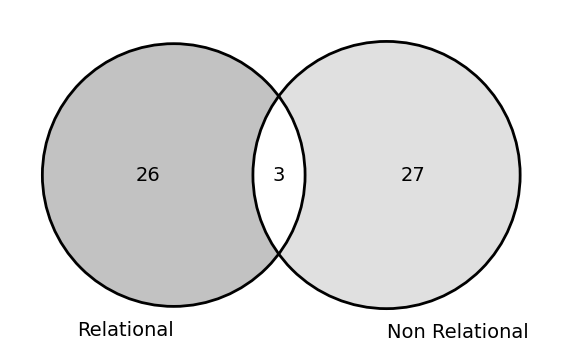

In [11]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
characterization_of_projects = pd.read_excel(RESOURCE_DIR + os.sep + 'output.xlsx', keep_default_na=False)

plt.figure(figsize=(7,7))
count_of_models = characterization_of_projects['Model'].value_counts()
A = count_of_models['Relational']
B = count_of_models['Non Relational']
AB = count_of_models['Multi Model']

venn = venn2(subsets = (A, B, AB), set_labels=('Relational', 'Non Relational'), set_colors=('darkgray', 'lightgray'), alpha= 0.7)
venn2_circles(subsets=(A, B, AB))

for text in venn.set_labels:  #change label size
 text.set_fontsize(14);
for text in venn.subset_labels:  #change number size
 text.set_fontsize(14)

 plt.savefig(IMAGES_DIR+"/fig10.pdf", format="pdf", bbox_inches="tight")

In [12]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn3, venn3_circles

# Carregar os DataFrames
# Suponha que 'projects_df' é o DataFrame que contém os projetos e bancos usados
# E 'relational_models_df' é o DataFrame que contém os modelos relacionais
projects_df = data_with_index
projects_df = projects_df.drop(columns=['Domains'])

projects_df_Trasponse = projects_df.T

projects_df_Trasponse.columns = projects_df_Trasponse.iloc[0] 
projects_df_Trasponse = projects_df_Trasponse.drop(projects_df_Trasponse.index[0]) 

#projects_df_Trasponse = projects_df_Trasponse.rename(columns={'Projects': 'Databases'}, inplace=True)


relational_dbs = ['Oracle', 'MySQL', 'MS SQL Server', 'PostgreSQL', 'IBM DB2', 
                  'MS Access', 'SQLite',  'Snowflake', 'Teradata', 'SapHana', 
                  'FileMaker', 'SAP Adaptive Server', 'Informix', 'Firebird', 'Vertica', 
                  'Impala', 'ClickHouse', 'H2', 'Ignite-Sql', 'Virtuoso-Sql', 
                  'Singlestore', 'Interbase', 'Ingres','SAP SQL Anywhere', 'HyperSQL']

nonreleational_dbs = ['Aerospike', 'ArangoDB', 'Cassandra', 'CouchDB', 'Couchbase',
       'DynamoDB', 'Etcd', 'Firebase Realtime', 'Google Cloud Datastore',
       'GoogleCloudFilestore', 'HBase', 'Hazelcast', 'Ignite-NoSql',
       'Influx DB', 'Kdb+', 'MarkLogic', 'Microsoft Azure CosmosDB',
       'Microsoft Azure Table Storage', 'MongoDB', 'Neo4j', 'PostGIS', 'Realm',
       'Redis', 'Riak KV', 'Virtuoso-NoSql']

projects_df_Trasponse['BD Type'] = projects_df_Trasponse.index.map(
    lambda x: 'Relational' if x in relational_dbs else ('Non Relational' if x in nonreleational_dbs else 'Multi Model')
)

projects_df_Trasponse



Projects,camel,activemq,Activiti,lottie-android,aliyun-openapi-java-sdk,alluxio,ambari,ambry,android,FXGL,...,xxl-job,yacy_search_server,Universal-G-Code-Sender,YCSB,zaproxy,zeppelin,zipkin,jeromq,zxing,BD Type
Microsoft Azure Table Storage,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Non Relational
MySQL,1,1,0,0,0,1,1,1,0,0,...,1,1,0,1,1,1,1,0,0,Relational
HyperSQL,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,Relational
MarkLogic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Non Relational
MS SQL Server,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Relational
Ignite-NoSql,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Non Relational
Ignite-Sql,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Relational
Ignite,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Multi Model
Virtuoso-Sql,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Relational
Virtuoso-NoSql,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Non Relational


In [13]:
data_only_relational= data_with_index[relational_dbs].sum().sort_values(ascending=False)
data_only_relational

# Ver com a Camila, em relação a diferença de números entre o gráfico do paper e o meu

MySQL                  113
H2                      92
PostgreSQL              92
Oracle                  78
HyperSQL                55
MS SQL Server           53
IBM DB2                 30
SQLite                  29
SAP SQL Anywhere        14
SAP Adaptive Server     13
ClickHouse              12
Informix                10
Firebird                10
SapHana                  9
Snowflake                8
Teradata                 8
MS Access                7
Singlestore              4
Ingres                   4
Ignite-Sql               3
Vertica                  2
Impala                   1
Virtuoso-Sql             0
Interbase                0
FileMaker                0
dtype: int64

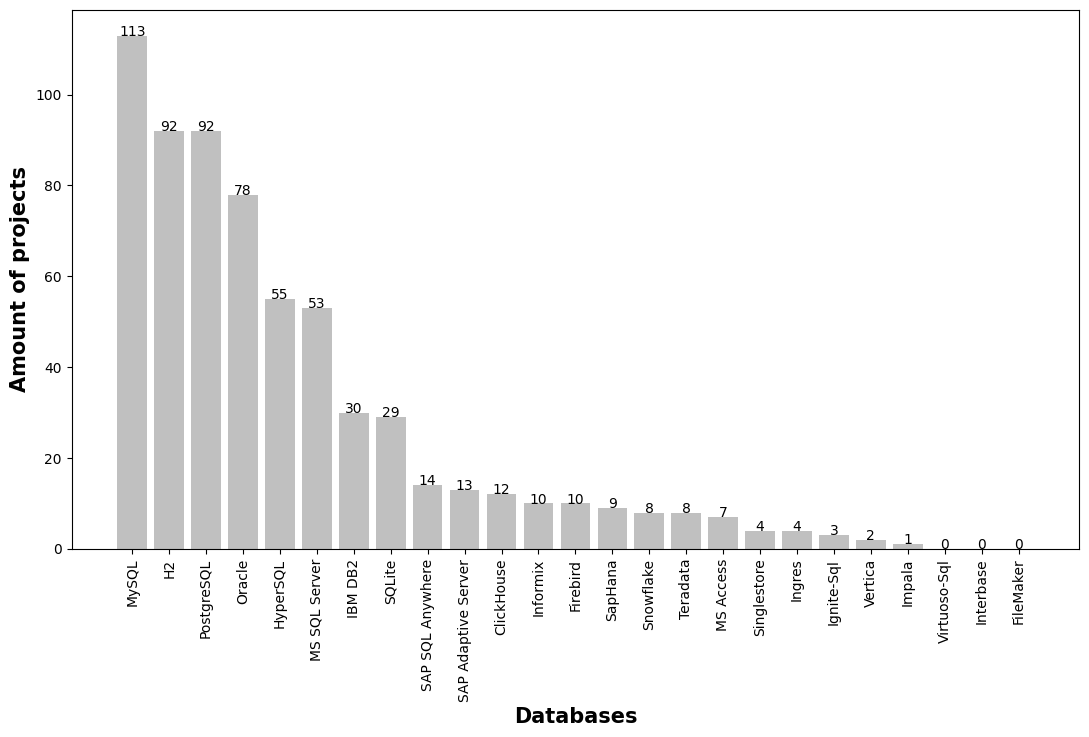

In [14]:
# Graph DBMS by Relational Model
plt.figure(figsize=(13,7))

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

plt.bar(data_only_relational.index, data_only_relational.values, color = 'silver')
addlabels(data_only_relational.index, data_only_relational.values)
plt.xticks(rotation=90)
plt.xlabel("Databases", fontweight = "bold", fontsize = 15)
plt.ylabel("Amount of projects", fontweight = "bold", fontsize = 15)

plt.show() 


In [15]:
data_only_non_relational = data_with_index.copy()
data_only_non_relational.drop(columns=relational_dbs, inplace=True)
data_only_non_relational

,Projects,Domains,Microsoft Azure Table Storage,MarkLogic,Ignite-NoSql,Ignite,Virtuoso-NoSql,Virtuoso,Riak KV,Redis,...,Firebase Realtime,MongoDB,Hazelcast,Influx DB,Realm,Cassandra,Microsoft Azure CosmosDB,CouchDB,PostGIS,Etcd
0,camel,Software Development,0,0,1,1,0,0,0,1,...,0,1,1,1,0,1,1,0,1,1
1,activemq,Network,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Activiti,Enterprise Resource Planning,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,lottie-android,Game,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,aliyun-openapi-java-sdk,Infrastructure Management,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,zaproxy,Security,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
386,zeppelin,Data Management,0,0,0,0,0,0,0,1,...,0,1,0,1,0,1,0,0,0,0
387,zipkin,Monitoring,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
388,jeromq,Infrastructure Management,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#data_only_non_relational.drop(['MarkLogic', 'Ignite', 'Virtuoso'], inplace=True, axis=1)

In [17]:
data_only_non_relational = data_only_non_relational.iloc[: , 2:].sum().sort_values(ascending=False)
data_only_non_relational

Redis                            80
MongoDB                          47
Google Cloud Datastore           33
DynamoDB                         32
Cassandra                        24
Hazelcast                        19
HBase                            16
MarkLogic                        13
Neo4j                            12
PostGIS                          10
Couchbase                         7
Firebase Realtime                 6
Microsoft Azure CosmosDB          6
ArangoDB                          6
Influx DB                         5
Etcd                              5
Ignite                            5
Ignite-NoSql                      5
Kdb+                              3
Riak KV                           3
GoogleCloudFilestore              2
Aerospike                         2
Virtuoso-NoSql                    2
CouchDB                           2
Virtuoso                          1
Realm                             1
Microsoft Azure Table Storage     1
dtype: int64

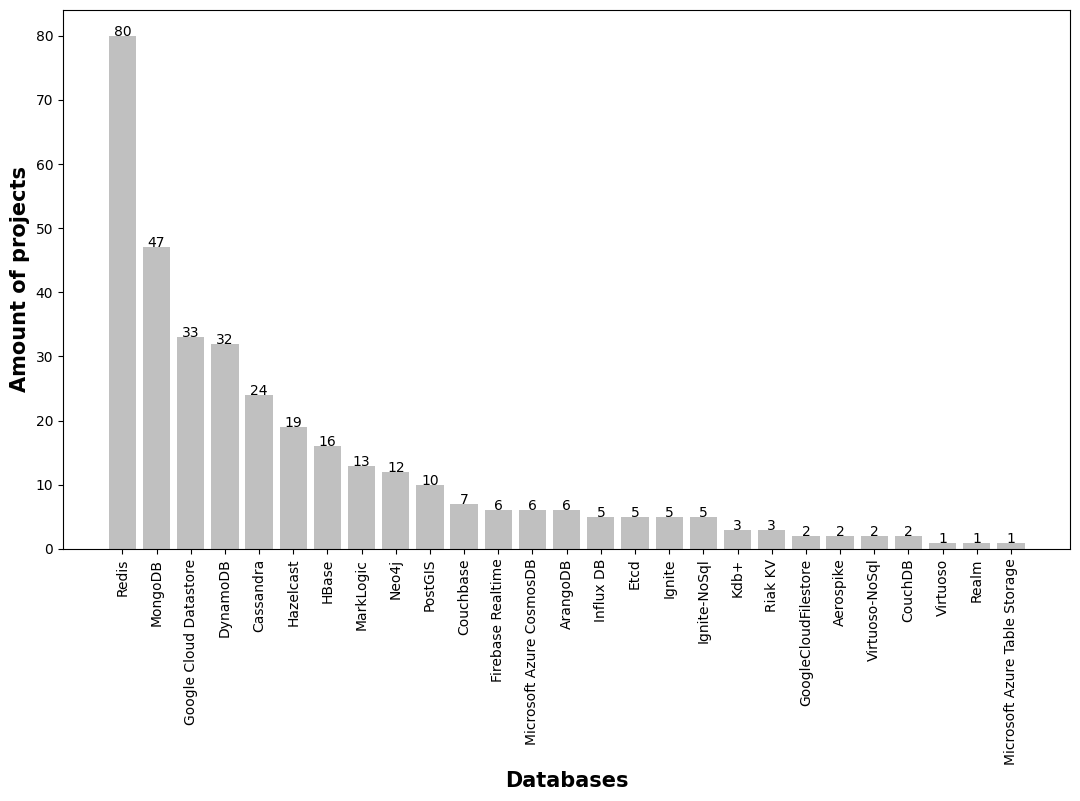

In [18]:
# Graph DBSM by Non Relational Model
plt.figure(figsize=(13,7))

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

plt.bar(data_only_non_relational.index, data_only_non_relational.values, color = 'silver')
addlabels(data_only_non_relational.index, data_only_non_relational.values)
plt.xticks(rotation=90)
plt.xlabel("Databases", fontweight = "bold", fontsize = 15)
plt.ylabel("Amount of projects", fontweight = "bold", fontsize = 15)

plt.show() 

In [19]:
# Get frequency of values in the 'Domains' column
freq_domains = data_with_index['Domains'].value_counts()
freq_domains

Software Development            96
Data Management                 75
Infrastructure Management       35
Program Analysis                29
Security                        22
Automation                      20
Network                         18
Game                            16
Media                           13
Monitoring                      13
Enterprise Resource Planning     9
Artificial Intelligence          9
Personal Management              8
File Management                  7
Collaboration                    7
Cryptocurrency                   5
Other                            3
High Performance Computing       3
Finances                         2
Name: Domains, dtype: int64

In [20]:
# Get the top 5 most frequent domains
most_popular_domains = freq_domains.head()
most_popular_domains = most_popular_domains.index
most_popular_domains

Index(['Software Development', 'Data Management', 'Infrastructure Management',
       'Program Analysis', 'Security'],
      dtype='object')

In [21]:
data_group_by_domain =  data_with_index[data_with_index['Domains'].isin(most_popular_domains)]
data_group_by_domain

,Projects,Domains,Microsoft Azure Table Storage,MySQL,HyperSQL,MarkLogic,MS SQL Server,Ignite-NoSql,Ignite-Sql,Ignite,...,Microsoft Azure CosmosDB,MS Access,SAP Adaptive Server,CouchDB,ClickHouse,Vertica,Teradata,PostgreSQL,PostGIS,Etcd
0,camel,Software Development,0,1,1,0,1,1,0,1,...,1,0,0,0,0,0,0,1,1,1
4,aliyun-openapi-java-sdk,Infrastructure Management,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,alluxio,Data Management,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,ambari,Infrastructure Management,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,ambry,Data Management,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,YCSB,Data Management,0,1,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
385,zaproxy,Security,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
386,zeppelin,Data Management,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
388,jeromq,Infrastructure Management,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


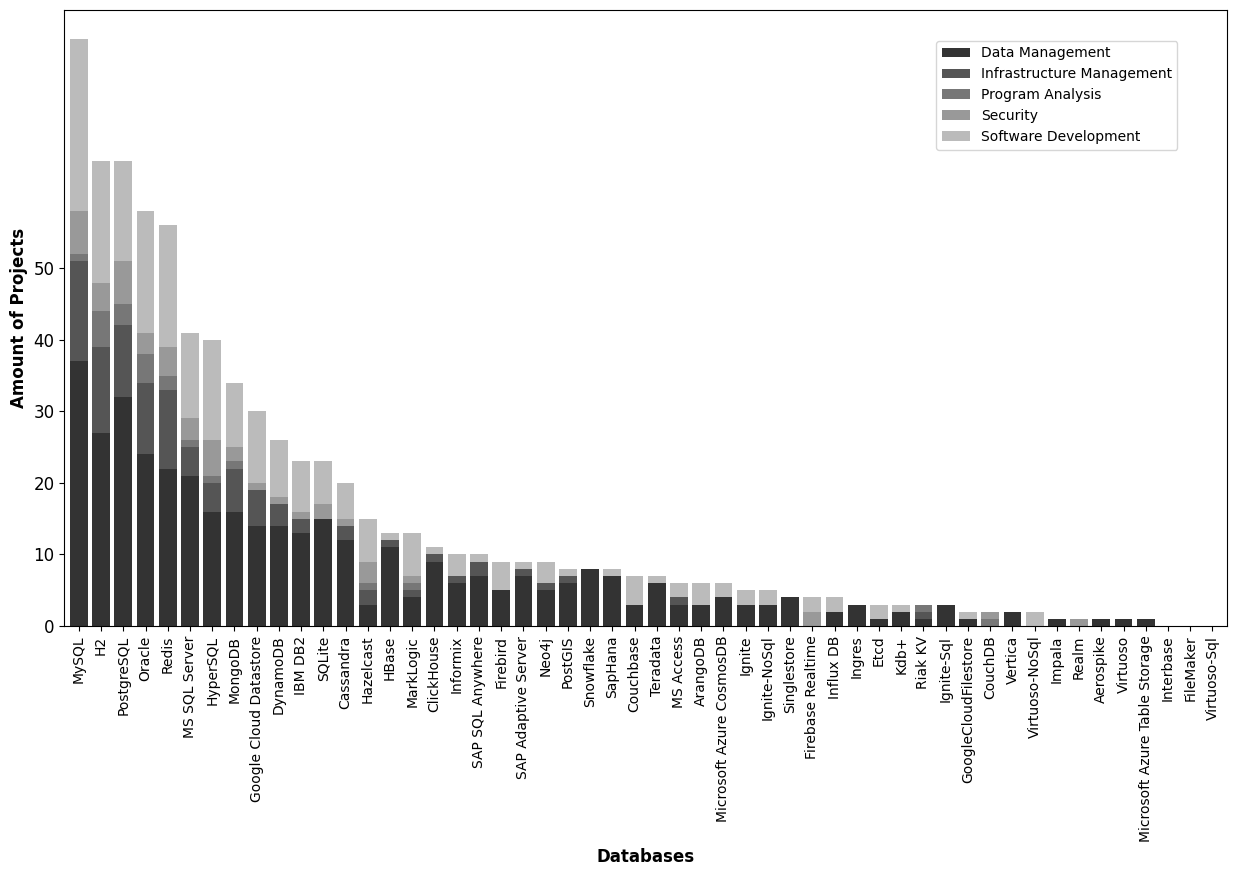

In [22]:
import matplotlib.pyplot as plt

grouped_data = data_group_by_domain.groupby('Domains').sum()

transposed_data = grouped_data.transpose()

# Sort the transposed data in descending order based on Amount of projects
transposed_data['Total'] = transposed_data.sum(axis=1)
transposed_data.sort_values(by='Total', inplace=True, ascending=False)
transposed_data.drop('Total', axis=1, inplace=True)

# Define grayscale colors
gray_colors = ['#333333', '#555555', '#777777', '#999999', '#BBBBBB']

# Create a stacked bar chart
ax = transposed_data.plot(kind='bar', stacked=True, figsize=(15, 8), color = gray_colors, width = 0.8)

# Set chart labels
plt.xlabel('Databases', fontsize=12, fontweight='bold')
plt.ylabel('Amount of Projects', fontsize=12, fontweight='bold')

# Rotate x-axis labels and set their color and weight
plt.xticks(rotation=90)

# Set y-axis ticks and labels
plt.yticks(range(0, 60, 10), fontsize=12)

# Adiciona grid pontilhado no eixo Y
#plt.grid(axis='y', linestyle=':', linewidth=0.8)


# Display the legend outside the plot
plt.legend(bbox_to_anchor=(0.75, 0.95), loc='upper left', borderaxespad=0.)
plt.savefig(IMAGES_DIR+"/fig4.pdf", format="pdf", bbox_inches="tight")
# Show the plot
plt.show()



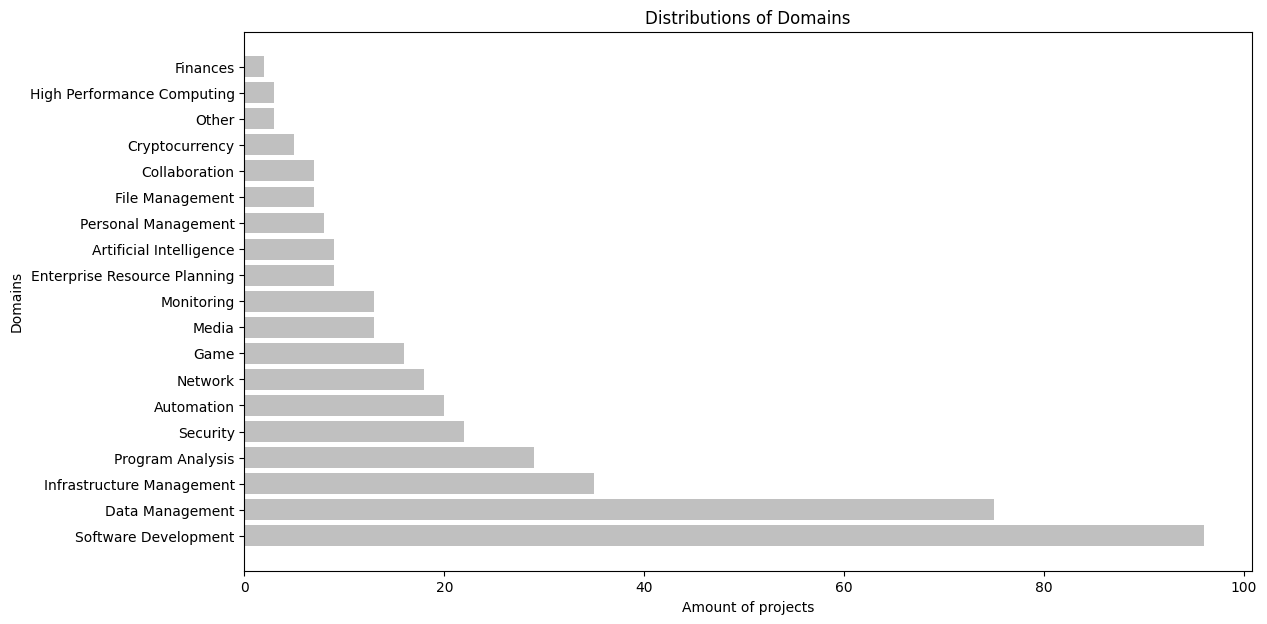

In [23]:
plt.figure(figsize=(13,7))

df = data_with_index.Domains.value_counts()
plt.barh(df.index, df.values, color='silver')
#plt.xticks(rotation=90)

plt.title("Distributions of Domains")
plt.xlabel("Amount of projects")
plt.ylabel("Domains")
plt.show() 

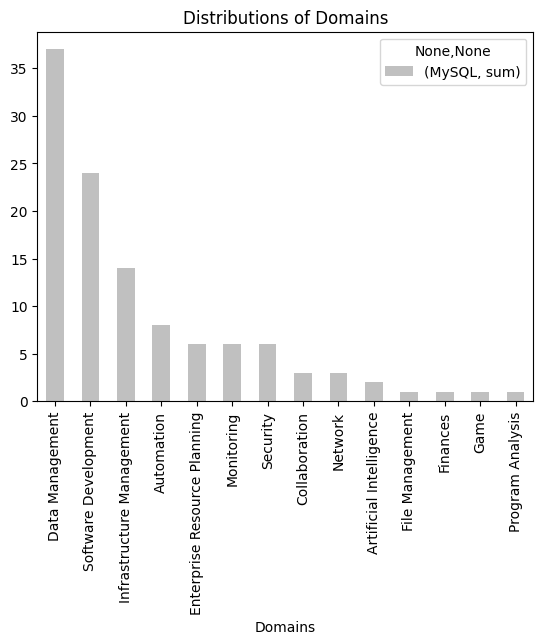

In [24]:
filtered_df = data_with_index.groupby('Domains').agg({'MySQL':['sum']})
filtered_df = filtered_df[filtered_df['MySQL']['sum'] > 0]
result = filtered_df.sort_values(by=('MySQL','sum'), ascending=False).plot(kind='bar', color='silver',title = 'Distributions of Domains')

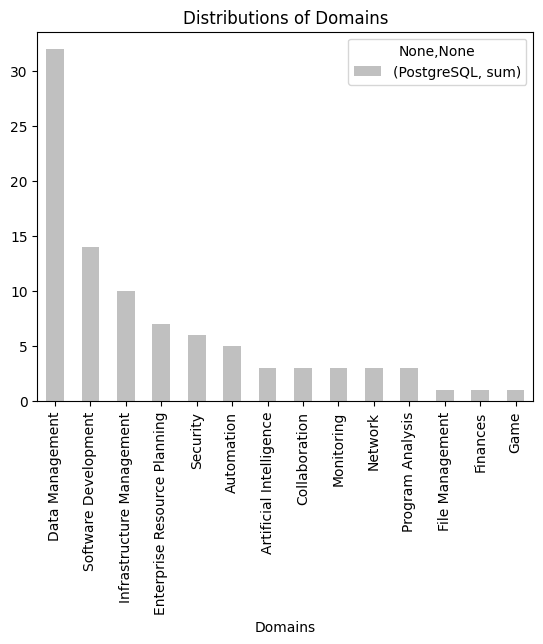

In [25]:

filtered_df = data_with_index.groupby('Domains').agg({'PostgreSQL':['sum']})
filtered_df = filtered_df[filtered_df['PostgreSQL']['sum'] > 0]
result = filtered_df.sort_values(by=('PostgreSQL','sum'), ascending=False).plot(kind='bar', color='silver',title = 'Distributions of Domains')

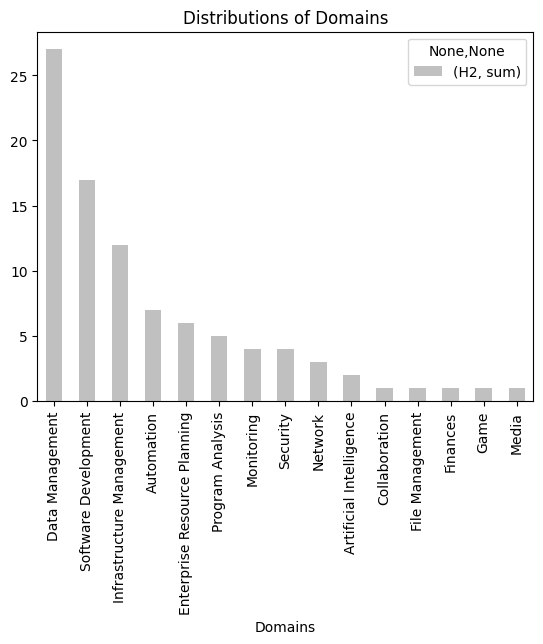

In [26]:

filtered_df = data_with_index.groupby('Domains').agg({'H2':['sum']})
filtered_df = filtered_df[filtered_df['H2']['sum'] > 0]
result = filtered_df.sort_values(by=('H2','sum'), ascending=False).plot(kind='bar', color='silver',title = 'Distributions of Domains')


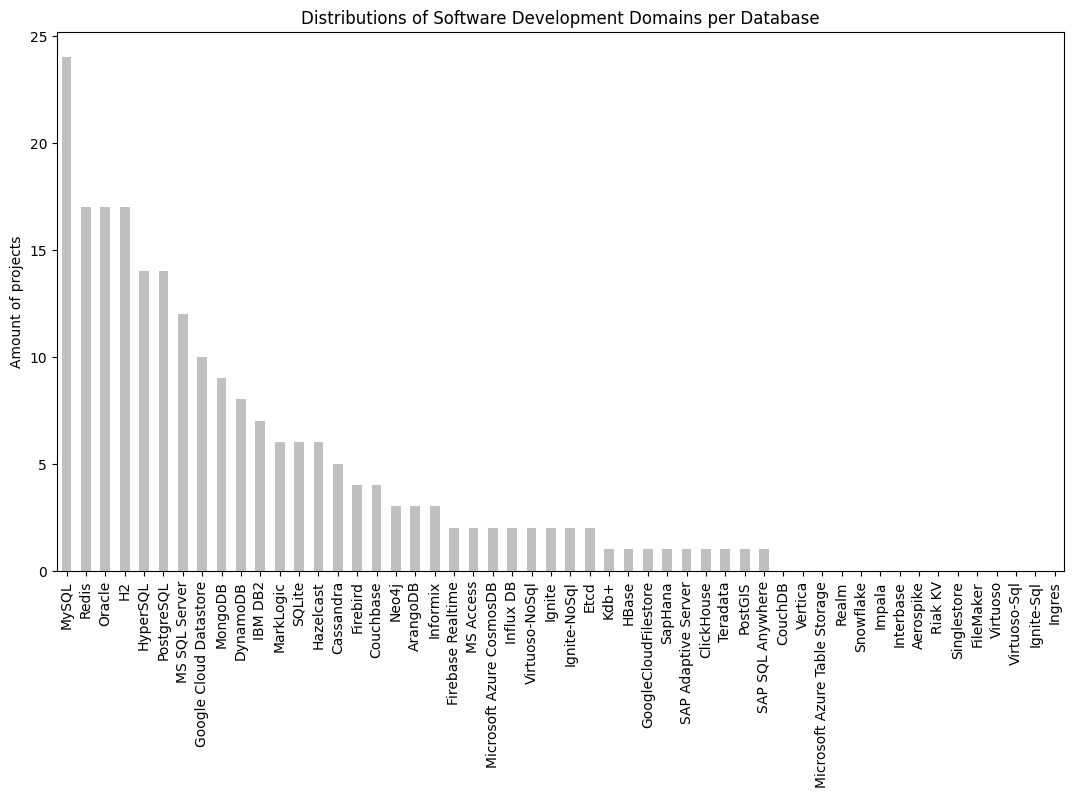

Text(0, 0.5, 'Amount of projects')

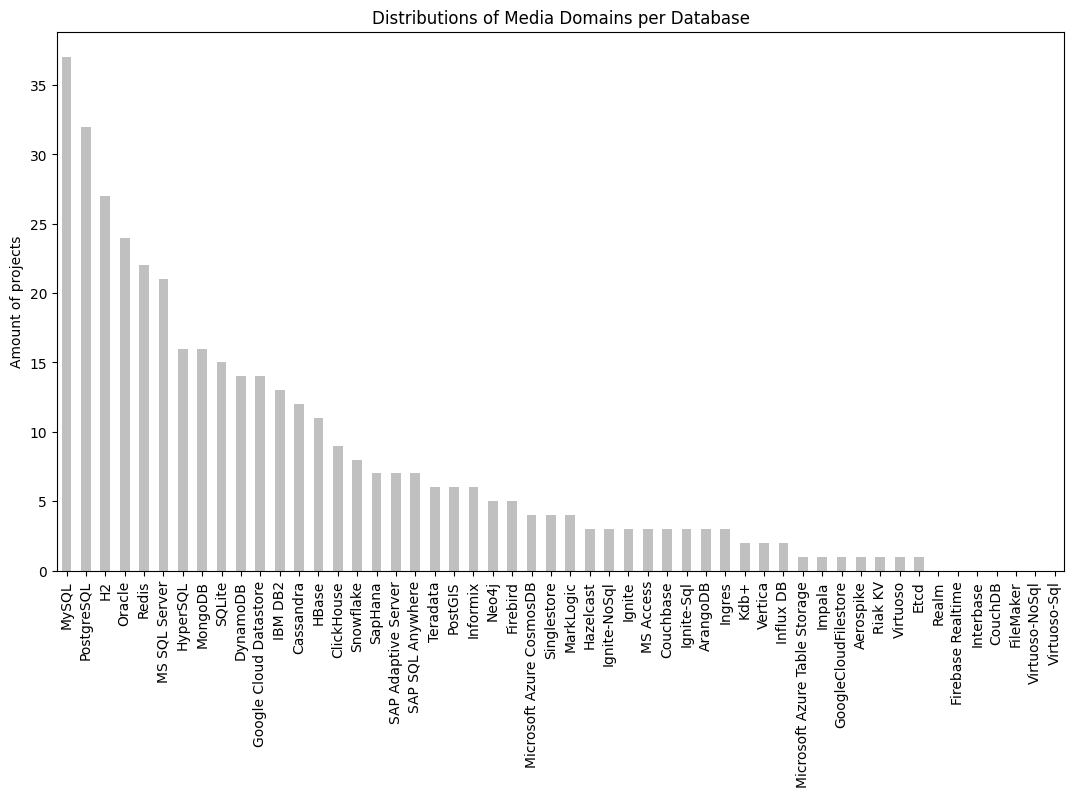

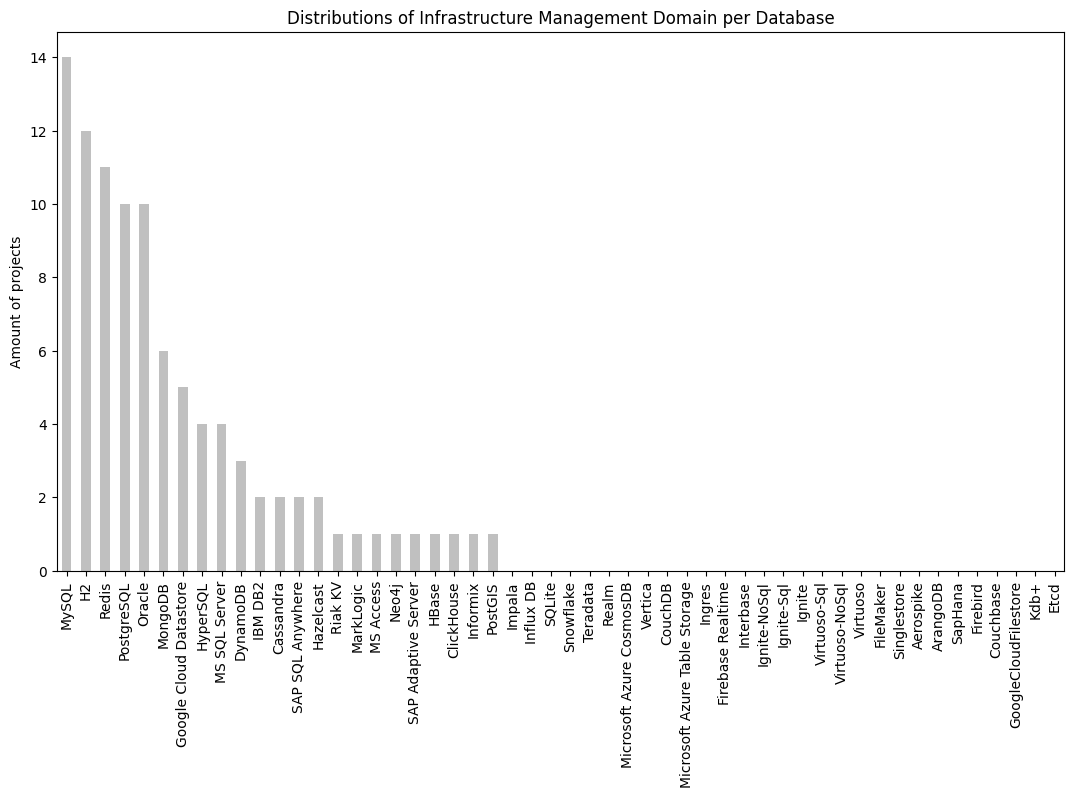

In [27]:


plt.figure(figsize=(13,7))
df_software_development = data_with_index[data_with_index.Domains =='Software Development'].sum()
df_software_development = df_software_development.iloc[2:].sort_values(ascending=False)
df_software_development.plot(kind='bar', color='silver',title = 'Distributions of Domains')
plt.title("Distributions of Software Development Domains per Database")
plt.ylabel("Amount of projects")
plt.show() 

plt.figure(figsize=(13,7))
media = data_with_index[data_with_index.Domains =='Data Management'].sum()
#print(df_software_development.iloc[2:].sort_values(ascending=False))
media.iloc[2:].sort_values(ascending=False).plot(kind='bar', color='silver', title = 'Distributions of Domains')
plt.title("Distributions of Media Domains per Database")
plt.ylabel("Amount of projects")
#plt.show() 

plt.figure(figsize=(13,7))
infrastructure_management = data_with_index[data_with_index.Domains =='Infrastructure Management'].sum()
infrastructure_management.iloc[2:].sort_values(ascending=False).plot(kind='bar', color='silver',title = 'Distributions of Domains')
plt.title("Distributions of Infrastructure Management Domain per Database")
plt.ylabel("Amount of projects")
#plt.show()



KeyError: 'software development'

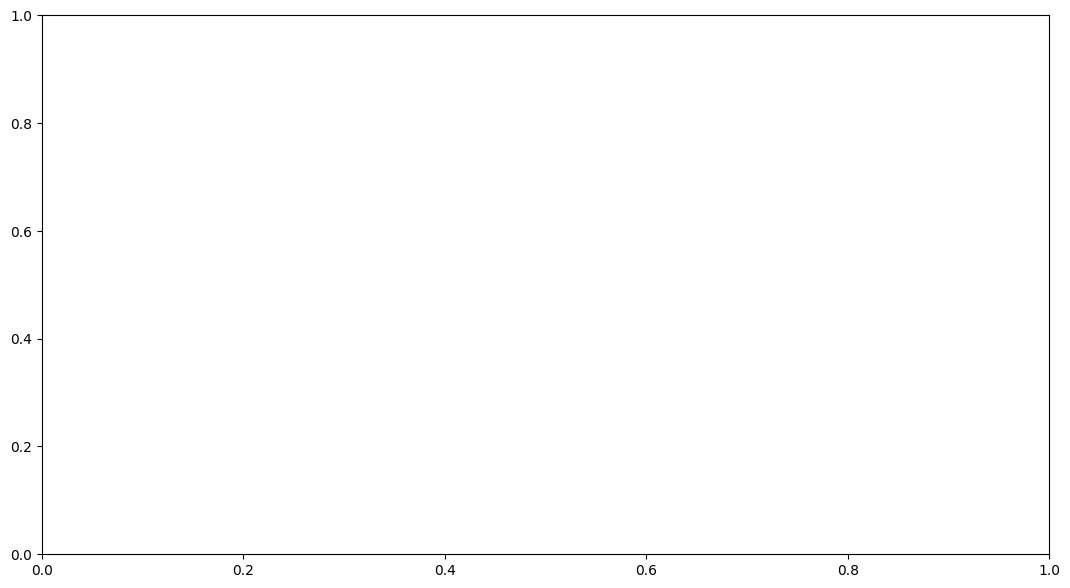

In [28]:
import numpy as np
import matplotlib.pyplot as plt
 
barWidth =1.0
fig = plt.subplots(figsize =(13, 7))

names_list = data_with_index.columns.to_list()
names_list.remove('Projects')
names_list.remove('Domains')

domains = data_with_index.groupby('Domains')

software_development = domains.get_group('software development')
software_development_sum = software_development.agg([np.sum])
software_development_results = software_development_sum.iloc[: , 2:].values.tolist()

media = domains.get_group('media')
media_sum = media.agg([np.sum])
media_results = media_sum.iloc[: , 2:].values.tolist()

infrastructure_management = domains.get_group('infrastructure management')
infrastructure_management_sum = infrastructure_management.agg([np.sum])
infrastructure_management_result = infrastructure_management_sum.iloc[: , 2:].values.tolist()

br1 = np.arange(len(software_development_results[0]))
plt.bar(br1, software_development_results[0], color='#CCCCCC', edgecolor='white', width = barWidth, label ='Software Development')
plt.bar(br1, media_results[0], bottom=software_development_results[0], color='#999999', edgecolor='white', width = barWidth, label ='Media')
plt.bar(br1, infrastructure_management_result[0], bottom=[i+j for i,j in zip(software_development_results[0], media_results[0])], color='#666666', edgecolor='white', width = barWidth, label ='Infrastructure Management')
plt.xlabel('Databases', fontweight ='bold', fontsize = 15)
plt.ylabel('Amount of projects', fontweight ='bold', fontsize = 15)
plt.xticks(br1, names_list, rotation=90)

plt.legend()
plt.show()

NameError: name 'IMAGES_DIR' is not defined

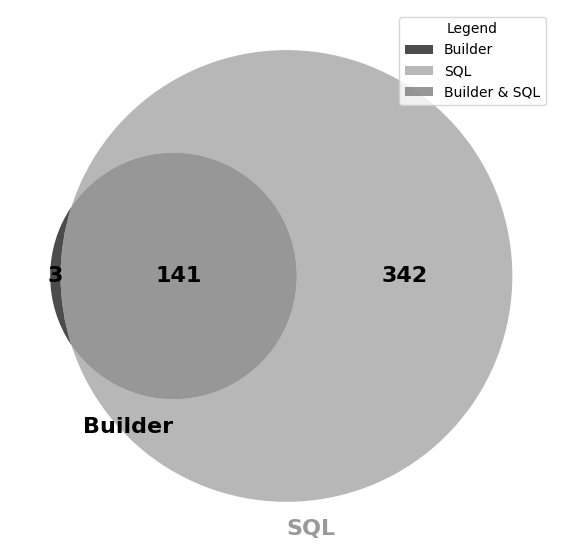

In [3]:
from collections import Counter
from util import RESOURCE_DIR
from matplotlib_venn import venn2

type_characterization = ['query.xlsx']
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[0]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
df.rename(columns = {'(IgnoreCase, SQL)':'SQL'}, inplace = True)

AB_overlap = 0
A_rest = 0
B_rest = 0

for i in range(len(df)):
    if (df.at[i,'Builder'] == df.at[i, 'SQL']):
        AB_overlap += 1
    elif (df.at[i,'Builder'] != df.at[i, 'SQL']) and (df.at[i,'SQL'] == 1):
        B_rest += 1
    elif (df.at[i,'Builder'] != df.at[i, 'SQL']) and (df.at[i,'Builder'] == 1):
        A_rest += 1

sets = Counter()
sets['10'] = A_rest
sets['01'] = B_rest
sets['11'] = AB_overlap

labels = ('Builder', 'SQL')
plt.figure(figsize=(7,7))
ax = plt.gca()
colors = ['#000000','#999999']
v = venn2(subsets=sets, set_labels=labels, ax=ax,set_colors= colors, alpha=0.7)

i = 0
for text in v.set_labels:
  text.set_color(colors[i])
  text.set_fontsize(16)
  text.set_fontweight('bold')
  i+=1
  
for text in v.subset_labels:
  text.set_color('black')
  text.set_fontsize(16)
  text.set_fontweight('bold')
  
h = [] 
for i in sets:
    h.append(v.get_patch_by_id(i)) 
l = ['Builder','SQL','Builder & SQL']
ax.legend(handles=h, labels=l, title="Legend",loc='upper right')  

plt.savefig(IMAGES_DIR+"/fig8.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [55]:
#calcula a quantidade de bancos utilizados e a quantidade de projetos que encontramos bancos
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[0]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
df['BDsPerProjects'] = df.sum(axis=1, numeric_only=True)
#df = df.iloc[2:].sort_values(ascending=False)
#df.count(by='BDsPerProjects')
df

,Projects,Domains,Virtuoso-NoSql,Microsoft Azure Table Storage,MySQL_Maria DB,HyperSQL,Ignite-NoSql,MarkLogic,MS SQL Server_Microsoft Azure SQL Database,Ignite-Sql,...,Virtuoso,SAP Adaptive Server,CouchDB,ClickHouse,Vertica,Teradata,PostgreSQL_ CockroachDB,PostGIS,Etcd,BDsPerProjects
0,camel,Software Development,0,0,1,1,1,0,1,0,...,0,0,0,0,0,0,1,1,1,19
1,activemq,Network,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,Activiti,Enterprise Resource Planning,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
3,aima-java,Software Development,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,lottie-android,Game,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,SmartTubeNext,Media,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
481,zeppelin,Data Management,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,10
482,zipkin,Monitoring,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
483,jeromq,Infrastructure Management,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
